In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_2/models/')
filename = "modelrf_fold2_15AB_15AB_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold2_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.040897,0.351586,-0.030261,-0.149328,0.460425,-0.180654,0.122782,-0.175839,-0.156982,-0.204932,...,-0.010500,-0.016705,0.010292,0.012904,0.442533,0.184683,Abnormal,P1,FP-A,AB01
1,-0.072285,1.323799,-0.166933,-0.107484,0.510200,-0.176453,0.014317,-0.136393,-0.160272,-0.194886,...,-0.103131,0.218681,-0.036714,0.567750,0.364546,0.156294,Abnormal,P2,FP-A,AB01
2,-0.107391,0.355211,0.183747,-0.132289,0.266835,-0.143766,0.231553,-0.166634,-0.166426,-0.193487,...,0.044543,0.069099,0.065420,-0.021234,0.871795,-0.085399,Abnormal,P41,FP-B,AB01
3,-0.085039,0.405265,-0.012612,-0.130904,0.225480,-0.194476,0.387900,-0.179702,-0.180285,-0.087195,...,0.180449,0.172342,-0.048618,0.034432,0.655451,-0.039368,Abnormal,P51,FP-C,AB01
4,-0.004411,0.097532,0.221049,-0.127832,-0.135684,-0.195243,-0.166283,-0.221145,-0.175454,-0.223149,...,0.037429,0.257229,0.034917,-0.097227,0.260026,0.115042,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.067310,0.504151,0.067287,0.182373,0.277937,-0.142310,-0.154446,0.198720,0.347090,-0.121324,...,-0.024423,-0.148274,0.423351,0.270881,0.381658,0.673144,Normal,P32,FP-B,Normal
1308,-0.002470,-0.032438,-0.178443,-0.082587,-0.075024,-0.006103,-0.187692,0.235972,0.215627,0.326885,...,0.053675,-0.159450,-0.073202,0.244533,-0.211338,0.139681,Normal,P42,FP-B,Normal
1309,0.164762,0.551677,-0.056460,0.333542,0.531126,-0.171873,-0.070091,-0.160378,-0.109603,-0.071367,...,0.353977,0.635299,0.403010,1.613096,0.394468,0.837815,Normal,P52,FP-C,Normal
1310,-0.085406,-0.036112,-0.014248,-0.087813,-0.131577,-0.093969,-0.144383,0.049494,0.120438,-0.100040,...,0.067499,-0.061260,0.054182,0.224243,-0.158725,0.139236,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.040897,0.351586,-0.030261,-0.149328,0.460425,-0.180654,0.122782,-0.175839,-0.156982,-0.204932,...,-0.187093,-0.223502,0.463830,0.049193,-0.010500,-0.016705,0.010292,0.012904,0.442533,0.184683
1,-0.072285,1.323799,-0.166933,-0.107484,0.510200,-0.176453,0.014317,-0.136393,-0.160272,-0.194886,...,-0.155020,-0.185852,0.005968,-0.021631,-0.103131,0.218681,-0.036714,0.567750,0.364546,0.156294
2,-0.107391,0.355211,0.183747,-0.132289,0.266835,-0.143766,0.231553,-0.166634,-0.166426,-0.193487,...,-0.142744,-0.197304,0.864609,-0.022679,0.044543,0.069099,0.065420,-0.021234,0.871795,-0.085399
3,-0.085039,0.405265,-0.012612,-0.130904,0.225480,-0.194476,0.387900,-0.179702,-0.180285,-0.087195,...,-0.193738,-0.195220,0.603120,0.121836,0.180449,0.172342,-0.048618,0.034432,0.655451,-0.039368
4,-0.004411,0.097532,0.221049,-0.127832,-0.135684,-0.195243,-0.166283,-0.221145,-0.175454,-0.223149,...,-0.145899,-0.201189,0.381433,-0.003606,0.037429,0.257229,0.034917,-0.097227,0.260026,0.115042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.067310,0.504151,0.067287,0.182373,0.277937,-0.142310,-0.154446,0.198720,0.347090,-0.121324,...,0.158784,-0.134594,0.250388,0.709066,-0.024423,-0.148274,0.423351,0.270881,0.381658,0.673144
1308,-0.002470,-0.032438,-0.178443,-0.082587,-0.075024,-0.006103,-0.187692,0.235972,0.215627,0.326885,...,0.039873,-0.023324,0.645001,0.184259,0.053675,-0.159450,-0.073202,0.244533,-0.211338,0.139681
1309,0.164762,0.551677,-0.056460,0.333542,0.531126,-0.171873,-0.070091,-0.160378,-0.109603,-0.071367,...,-0.168500,-0.182210,0.290810,0.561666,0.353977,0.635299,0.403010,1.613096,0.394468,0.837815
1310,-0.085406,-0.036112,-0.014248,-0.087813,-0.131577,-0.093969,-0.144383,0.049494,0.120438,-0.100040,...,0.270959,-0.147257,-0.184347,0.275912,0.067499,-0.061260,0.054182,0.224243,-0.158725,0.139236


In [6]:
y_test

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
dataframe['Sub_class_pred'] = y_pred
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,Sub_class_pred
0,-0.040897,0.351586,-0.030261,-0.149328,0.460425,-0.180654,0.122782,-0.175839,-0.156982,-0.204932,...,-0.016705,0.010292,0.012904,0.442533,0.184683,Abnormal,P1,FP-A,AB01,Normal
1,-0.072285,1.323799,-0.166933,-0.107484,0.510200,-0.176453,0.014317,-0.136393,-0.160272,-0.194886,...,0.218681,-0.036714,0.567750,0.364546,0.156294,Abnormal,P2,FP-A,AB01,AB01
2,-0.107391,0.355211,0.183747,-0.132289,0.266835,-0.143766,0.231553,-0.166634,-0.166426,-0.193487,...,0.069099,0.065420,-0.021234,0.871795,-0.085399,Abnormal,P41,FP-B,AB01,AB01
3,-0.085039,0.405265,-0.012612,-0.130904,0.225480,-0.194476,0.387900,-0.179702,-0.180285,-0.087195,...,0.172342,-0.048618,0.034432,0.655451,-0.039368,Abnormal,P51,FP-C,AB01,AB01
4,-0.004411,0.097532,0.221049,-0.127832,-0.135684,-0.195243,-0.166283,-0.221145,-0.175454,-0.223149,...,0.257229,0.034917,-0.097227,0.260026,0.115042,Abnormal,P31,FP-B,AB01,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.067310,0.504151,0.067287,0.182373,0.277937,-0.142310,-0.154446,0.198720,0.347090,-0.121324,...,-0.148274,0.423351,0.270881,0.381658,0.673144,Normal,P32,FP-B,Normal,Normal
1308,-0.002470,-0.032438,-0.178443,-0.082587,-0.075024,-0.006103,-0.187692,0.235972,0.215627,0.326885,...,-0.159450,-0.073202,0.244533,-0.211338,0.139681,Normal,P42,FP-B,Normal,Normal
1309,0.164762,0.551677,-0.056460,0.333542,0.531126,-0.171873,-0.070091,-0.160378,-0.109603,-0.071367,...,0.635299,0.403010,1.613096,0.394468,0.837815,Normal,P52,FP-C,Normal,Normal
1310,-0.085406,-0.036112,-0.014248,-0.087813,-0.131577,-0.093969,-0.144383,0.049494,0.120438,-0.100040,...,-0.061260,0.054182,0.224243,-0.158725,0.139236,Normal,P61,FP-C,Normal,Normal


In [9]:
act = dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = dataframe['Sub_class_pred'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 91.9969512195122%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       857
           1       0.99      0.77      0.87       455

    accuracy                           0.92      1312
   macro avg       0.94      0.89      0.91      1312
weighted avg       0.93      0.92      0.92      1312



855 2 103 352


Text(0.5, 21.5, 'Predicted label')

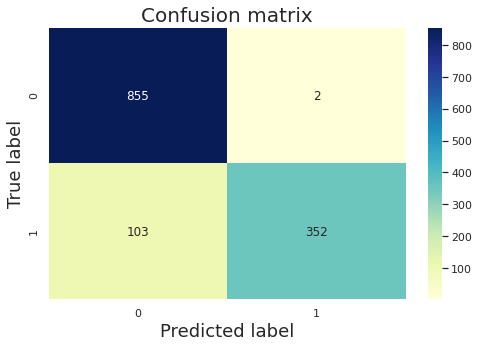

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [11]:
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('TP = ', TP)

TN =  855
FP =  2
FN =  103
TP =  352


In [12]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 46  10   0   0   0   0   0   0   0   0   0   0   0   0  18]
 [  6  43   4   0   0   0   0   0   0   0   0   0   0   0   7]
 [  0  10   7   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0  26   0   1   0   0   0   0   0   0   0   2  14]
 [  0   0   0   0  18   1   0   0   0   0   0   0   0   0  10]
 [  0   0   0   0   0  11   1   0   0   0   0   0   0   0   9]
 [  0   0   0   0   0   1   9   0   0   0   0   0   0   0  11]
 [  2   0   0   2   0   0   0  16   0   0   0   0   0   3   9]
 [  0   0   0   0   1   0   0   2  16   2   1   0   0   1   5]
 [  0   0   0   1   0   0   0   0   3   5   0   0   0   1   1]
 [  0   0   0   0   0   0   0   0   0   0  20   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   5   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0  17   4   2]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0  51   6]
 [  1   0   0   0   1   0   0   0   0   0   0   0   0   0 855]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

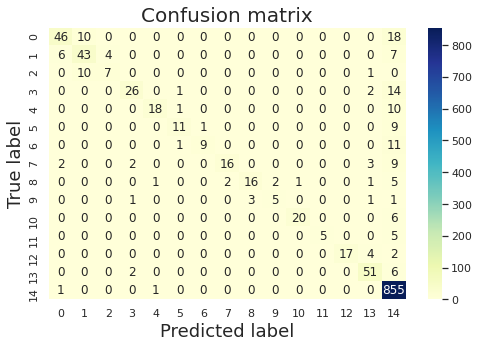

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)